In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Data-Collisions (1).csv')


C:\Users\priya\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
%%capture
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
%matplotlib inline
import itertools
from sklearn import linear_model
import matplotlib.ticker as ticker
import matplotlib.ticker as NullFormatter
from sklearn import preprocessing
from ipykernel import kernelapp as app
import scipy.optimize as opt

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
data.drop(columns=['INCDATE', 'INCDTTM','X', 'Y','OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS','INTKEY','EXCEPTRSNCODE','SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND',
       'EXCEPTRSNDESC','PEDROWNOTGRNT', 'SDOTCOLNUM','ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY','PEDCOUNT','PEDCYLCOUNT', 'HITPARKEDCAR'],inplace=True)



In [5]:
data.drop(columns=['ADDRTYPE', 'LOCATION','PERSONCOUNT','SEVERITYCODE.1','UNDERINFL','SEVERITYDESC','JUNCTIONTYPE','SPEEDING'],inplace = True)


In [6]:
data

,SEVERITYCODE,COLLISIONTYPE,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,2,Angles,2,Overcast,Wet,Daylight
1,1,Sideswipe,2,Raining,Wet,Dark - Street Lights On
2,1,Parked Car,3,Overcast,Dry,Daylight
3,1,Other,3,Clear,Dry,Daylight
4,2,Angles,2,Raining,Wet,Daylight
...,...,...,...,...,...,...
194668,2,Head On,2,Clear,Dry,Daylight
194669,1,Rear Ended,2,Raining,Wet,Daylight
194670,2,Left Turn,2,Clear,Dry,Daylight
194671,2,Cycles,1,Clear,Dry,Dusk


In [7]:
data.dtypes

SEVERITYCODE      int64
COLLISIONTYPE    object
VEHCOUNT          int64
WEATHER          object
ROADCOND         object
LIGHTCOND        object
dtype: object

In [8]:
data['SEVERITYCODE'].unique()

array([2, 1], dtype=int64)

In [9]:

new_data = data.dropna(axis = 0, how ='any')  


In [10]:
m=new_data.isnull()
for col in m.columns.values.tolist():
    print(m[col].value_counts())

False    189316
Name: SEVERITYCODE, dtype: int64
False    189316
Name: COLLISIONTYPE, dtype: int64
False    189316
Name: VEHCOUNT, dtype: int64
False    189316
Name: WEATHER, dtype: int64
False    189316
Name: ROADCOND, dtype: int64
False    189316
Name: LIGHTCOND, dtype: int64


In [11]:
new_data.describe(include=['object'])


,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND
count,189316,189316,189316,189316
unique,10,11,9,9
top,Parked Car,Clear,Dry,Daylight
freq,47815,111002,124294,116064


In [12]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189316 entries, 0 to 194672
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   SEVERITYCODE   189316 non-null  int64 
 1   COLLISIONTYPE  189316 non-null  object
 2   VEHCOUNT       189316 non-null  int64 
 3   WEATHER        189316 non-null  object
 4   ROADCOND       189316 non-null  object
 5   LIGHTCOND      189316 non-null  object
dtypes: int64(2), object(4)
memory usage: 10.1+ MB


Text(0, 0.5, 'no of accidents')

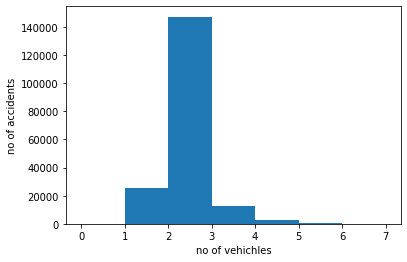

In [13]:
bins=np.arange(new_data['VEHCOUNT'].min(),8,1)
plt.hist(new_data['VEHCOUNT'],bins=bins)
plt.xlabel('no of vehichles')
plt.ylabel('no of accidents')


([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

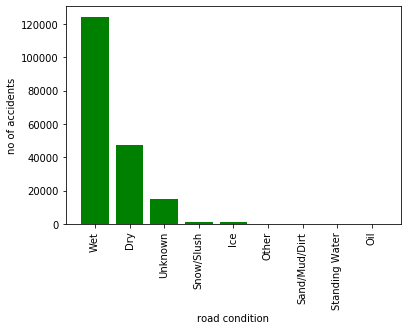

In [14]:
group_rc = new_data['ROADCOND'].unique()
data=new_data['ROADCOND'].value_counts()
plt.bar(x = group_rc,height = data,color = 'g')
plt.xlabel('road condition')
plt.ylabel('no of accidents')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

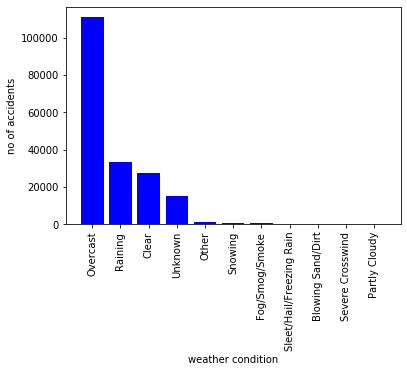

In [15]:
group_w = new_data['WEATHER'].unique()
data_2=new_data['WEATHER'].value_counts()
plt.bar(x = group_w,height = data_2,color = 'b')
plt.xlabel('weather condition')
plt.ylabel('no of accidents')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

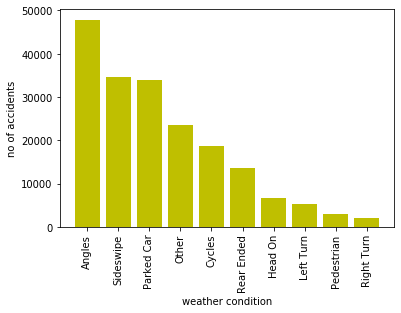

In [16]:
group_ct = new_data['COLLISIONTYPE'].unique()
group_ct
data_3 = new_data['COLLISIONTYPE'].value_counts()
plt.bar(x = group_ct,height = data_3, color = 'y')
plt.xlabel('weather condition')
plt.ylabel('no of accidents')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

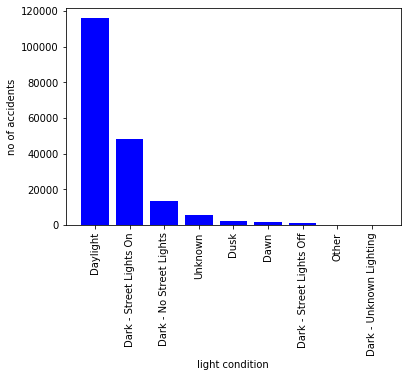

In [17]:
group_lt = new_data['LIGHTCOND'].unique()
group_lt
data_4 = new_data['LIGHTCOND'].value_counts()
plt.bar(x = group_lt,height = data_4, color = 'b')
plt.xlabel('light condition')
plt.ylabel('no of accidents')
plt.xticks(rotation = 90)

In [18]:
vc=new_data['VEHCOUNT'].unique()
vc

array([ 2,  3,  1,  4,  0,  7,  5,  6,  8, 11,  9, 10, 12], dtype=int64)

In [19]:
wc=new_data['WEATHER'].unique()
wc

array(['Overcast', 'Raining', 'Clear', 'Unknown', 'Other', 'Snowing',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

In [20]:
new_data['SEVERITYCODE'].unique()

array([2, 1], dtype=int64)

In [21]:
lc=new_data['LIGHTCOND'].unique()
lc
new_data["LIGHTCOND"] = new_data["LIGHTCOND"].astype('category')

rc=new_data['ROADCOND'].unique()
rc
new_data["ROADCOND"] = new_data["ROADCOND"].astype('category')

wc=new_data['WEATHER'].unique()
wc
new_data["WEATHER"] = new_data["WEATHER"].astype('category')

ct=new_data['COLLISIONTYPE'].unique()
ct
new_data["COLLISIONTYPE"] = new_data["COLLISIONTYPE"].astype('category')


C:\Users\priya\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\priya\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\priya\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

# Label Encoding

In [22]:
data = new_data.drop(columns =['COLLISIONTYPE'])
data["nLIGHTCOND"] = data["LIGHTCOND"].cat.codes
data["nROADCOND"] = data["ROADCOND"].cat.codes
data["nWEATHER"] = data["WEATHER"].cat.codes
data["nWEATHER"] = data["WEATHER"].cat.codes
data.dtypes

SEVERITYCODE       int64
VEHCOUNT           int64
WEATHER         category
ROADCOND        category
LIGHTCOND       category
nLIGHTCOND          int8
nROADCOND           int8
nWEATHER            int8
dtype: object

In [23]:
data_new = data.drop(columns =['LIGHTCOND','ROADCOND','WEATHER',])

In [24]:
data_new

,SEVERITYCODE,VEHCOUNT,nLIGHTCOND,nROADCOND,nWEATHER
0,2,2,5,8,4
1,1,2,2,8,6
2,1,3,5,0,4
3,1,3,5,0,1
4,2,2,5,8,6
...,...,...,...,...,...
194668,2,2,5,0,1
194669,1,2,5,8,6
194670,2,2,5,0,1
194671,2,1,6,0,1


In [25]:
data_new['SEVERITYCODE'].value_counts()

1    132277
2     57039
Name: SEVERITYCODE, dtype: int64

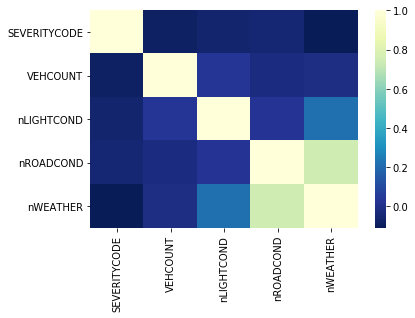

In [26]:
sns.heatmap(data_new.corr(), cmap='YlGnBu_r')
plt.show()

# Linear regression model

In [27]:
x = np.asarray(data_new[['VEHCOUNT','nLIGHTCOND','nROADCOND','nWEATHER']])
y = np.asarray(data_new[['SEVERITYCODE']])
regr=linear_model.LinearRegression()
regr.fit(x,y)
print(regr.coef_)

[[-0.06593003 -0.00696535  0.00845026 -0.02511717]]


ordinary least square prediction

In [28]:
y_hat = regr.predict(data_new[['VEHCOUNT','nLIGHTCOND','nROADCOND','nWEATHER']])
print("residual sum of square:%.2f" %np.mean(y_hat-y)**2)
print("variance score:%.2f" %regr.score(x,y))


residual sum of square:0.00
variance score:0.02


# knn algorithm

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 4)
print('train set',x_train.shape,y_train.shape)
print('test set',x_test.shape,y_test.shape)

train set (151452, 4) (151452, 1)
test set (37864, 4) (37864, 1)


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [32]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

C:\Users\priya\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [33]:
yhat = neigh.predict(x_test)
yhat[0:5]

array([1, 1, 1, 2, 2], dtype=int64)

In [34]:

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.556651612392045
Test set Accuracy:  0.5557785759560533


##### accuracy evaluation

In [35]:
from sklearn import metrics

In [36]:
print("train set accuracy",metrics.accuracy_score(y_train,neigh.predict(x_train)))

train set accuracy 0.556651612392045


In [37]:
print("test set accuracy",metrics.accuracy_score(y_test,yhat))

test set accuracy 0.5557785759560533


# SVM model

In [38]:
x = np.asarray(data_new[['VEHCOUNT','nLIGHTCOND','nROADCOND','nWEATHER']])
y = np.asarray(data_new[['SEVERITYCODE']]).ravel()


In [39]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.5, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (94658, 4) (94658,)
Test set: (94658, 4) (94658,)


In [40]:
from sklearn import svm
 

In [41]:
clf = svm.SVC(kernel='rbf',gamma ='scale',probability=True)


In [42]:
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [43]:
yhat = clf.predict(x_test)
yhat [0:5]

array([1, 1, 1, 2, 1], dtype=int64)

evaluation

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.72      0.97      0.83     66058
           2       0.64      0.15      0.24     28600

    accuracy                           0.72     94658
   macro avg       0.68      0.56      0.53     94658
weighted avg       0.70      0.72      0.65     94658

Confusion matrix, without normalization
[[63749  2309]
 [24426  4174]]


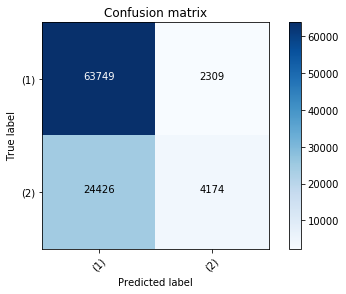

In [46]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['(1)','(2)'],normalize= False,  title='Confusion matrix')

In [47]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6487858243877695

In [48]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.7175621711846859


# decision tree

In [28]:
from sklearn.tree import DecisionTreeClassifier


In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 4)
print('train set',x_train.shape,y_train.shape)
print('test set',x_test.shape,y_test.shape)

train set (151452, 4) (151452, 1)
test set (37864, 4) (37864, 1)


In [30]:
dtree = DecisionTreeClassifier(criterion ="entropy", max_depth = 6)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### prediction

In [31]:
ptree = dtree.predict(x_test)
print(ptree[0:5])


[1 1 1 2 1]


#### evaluation

In [32]:
from sklearn import metrics
print("DT accuracy",metrics.accuracy_score(y_test,ptree))

DT accuracy 0.7193112190999366


In [33]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [34]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

C:\Users\priya\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [35]:
dot_data = StringIO()
filename = "dtree.png"
featureNames = data_new.columns[1:5]
targetNames = data_new["SEVERITYCODE"].unique().tolist()

t = np.unique(y_train)
s = map(str, t)
for i in s:
    print(i)

1
2


In [36]:
out=tree.export_graphviz(dtree,feature_names=featureNames, out_file=dot_data, class_names= list(map(str, np.unique(y_train))), filled=True,special_characters=True, rotate=False)  


In [37]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


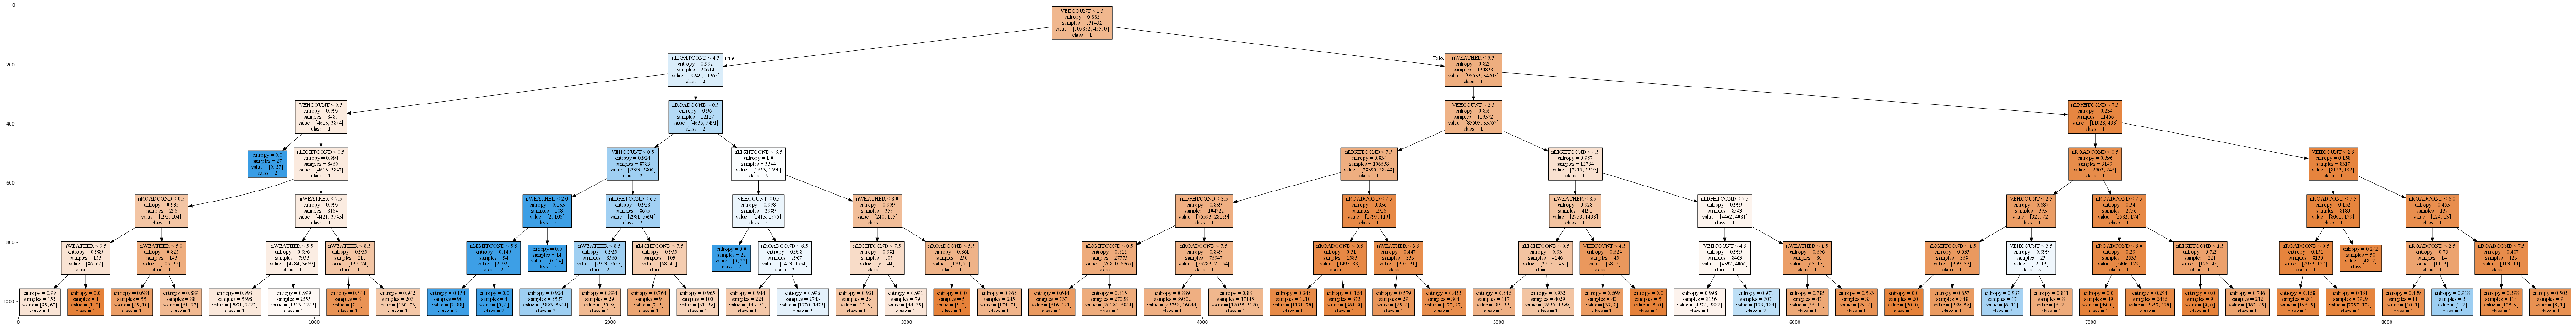

In [38]:
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')



In [ ]:
plt.savefig("C:/Users/priya/Desktop/dtree.png", dpi=300)

# logistic regression model

In [39]:
import scipy.optimize as opt
import pylab as pl

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (151452, 4) (151452, 1)
Test set: (37864, 4) (37864, 1)


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

C:\Users\priya\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
yhat = LR.predict(x_test)
yhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [43]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.72076512, 0.27923488],
       [0.7413265 , 0.2586735 ],
       [0.7413265 , 0.2586735 ],
       ...,
       [0.65178535, 0.34821465],
       [0.67634483, 0.32365517],
       [0.85176631, 0.14823369]])

 ##### evaluation

In [44]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.6969416860342278

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[26352     0]
 [    0     0]]


Confusion matrix, without normalization
[[26352     0]
 [    0     0]]


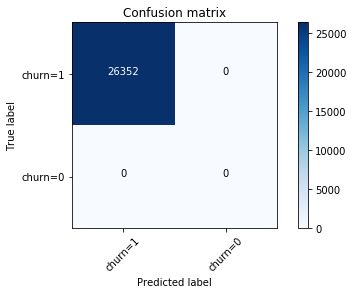

In [46]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [47]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.70      1.00      0.82     26395
           2       0.46      0.00      0.01     11469

    accuracy                           0.70     37864
   macro avg       0.58      0.50      0.41     37864
weighted avg       0.63      0.70      0.57     37864



In [48]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6014771549621085